## Table of Content

1. Hypothesis Generation

2. Data Exploration

3. Data Cleaning

4. Feature Engineering

5. Model Building

6. Hyper Parameter Tuning

### Hypothesis Generation

#### a. Store Level:

 - City: It plays an important role in the sales as metropolitan cities will have better sales.
 
 - Location: Stores in marketplaces will have higher sales.
 
 - Population: Stores in densely populated areas will have higher sales.
 
 - Competitor: Stores which have similar other stores will have less sales.
 
 - Ambiance: Well maintaned Stores will have higher sales.
 
 
 #### b. Customer Level: 
 
 - Customer Income: Customers having higher income will have will likely buy more products.
 
 - Family size: Larger family will directly impact the sales.
 
 - Customer Behaviour: If the stores meet all the needs of the customers then the sales willbe higher.
 
 - Job Profile: Customers having executive level jobs are likely to spend more.
 
 
 #### c. Product Level:
 
 - Utility: If the product is meeting the utility needs of the customer then it will impact the sales.
 
 - Display Area: If the product is given a larger display area in store then it is likely to be sold.
 
 - Advertising: If the Advertising of the product is done correctly then it will catch the attention of the customers ans thus likely to be sold.
 
 - Visibility in Store: The more visible the product is in store likely it is to be sold.
 
 - Brand: Brandedproduct have higher sales.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz 

%matplotlib inline

In [2]:
train_original=pd.read_csv('train.csv')
test_original=pd.read_csv('test.csv')

In [3]:
train=train_original.copy()
test=test_original.copy()

In [4]:
train.shape,test.shape

((8523, 12), (5681, 11))

In [5]:
train['source']='train'
test['source']='test'

data=pd.concat([train,test],ignore_index=True)

In [6]:
# train.shape,test.shape,data.shape

In [7]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


### Data Exploration

In this section we will explore the power of SweetViz library.

**SweetViz** : It is an open-source Python library which is generally used to create beautiful, high density graphs to kickstart EDA with just two lines of code. Output is a fully self-contained HTML application.

#### Reference
https://www.analyticsvidhya.com/blog/2021/05/sweetviz-library-eda-in-seconds/

In [8]:
## Analyzing the whole dataframe.
my_report = sweetviz.analyze([train, "Train"],target_feat='Item_Outlet_Sales')

my_report.show_html('Report.html')

                                             |                                             | [  0%]   00:00 ->…

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [9]:
## Comparing the train & test dataset

my_report1 = sweetviz.compare([train, "Train"], [test, "Test"], "Item_Outlet_Sales")
my_report1.show_html('Report1.html')

                                             |                                             | [  0%]   00:00 ->…

Report Report1.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Observation

1. Item_Visibility has 0.00 as min value which does not make sense as when the product is placed in the store it has to be visible.
2. Outlet_Establishment_Year is mainly from 1985-2009. We can futher convert this into date format and calculate how old the store is.

3. We can see that Item_Type has 16 unique variables.

4. We can see that Item_Fat_Content has a few miss-spelled names.

5. We can try and see if we are getting better results by combining the Supermarket Type3 & Supermarket Type2 from the Outlet_Type column .

### Data Cleaning

##### This generally involves treating the missing values and outliers. This step is important in case of Regression algorithms . Advanced tree algorithms are not affected by these.

In [10]:
(data.isnull().sum()/data.shape[0])*100

Item_Identifier               0.000000
Item_Weight                  17.171219
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
source                        0.000000
dtype: float64

C:\Users\Dishaa\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

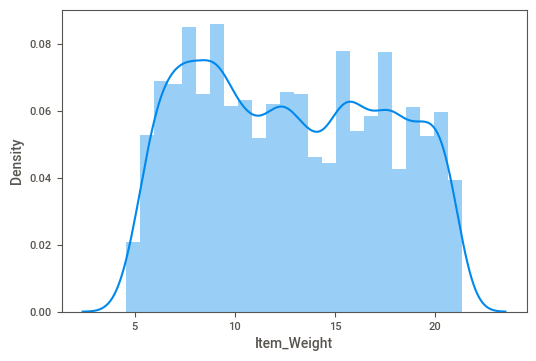

In [11]:
sns.distplot(data['Item_Weight'])

We will now replace the missing values in the Item_Weight column wrt to Item_Identifier

In [12]:
item_df=pd.pivot_table(data,'Item_Weight',index='Item_Identifier')
item_df

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [13]:
missing=data['Item_Weight'].isnull()
data.loc[missing,'Item_Weight']=data.loc[missing,'Item_Identifier'].apply(lambda x: item_df.loc[x,'Item_Weight'] )

In [14]:
(data.isnull().sum()/data.shape[0])*100

Item_Identifier               0.000000
Item_Weight                   0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
source                        0.000000
dtype: float64

In [15]:
from scipy.stats import mode

outlet_df=data.pivot_table(values='Outlet_Size',index='Outlet_Type',aggfunc=lambda x:mode(x).mode[0])
outlet_df

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [16]:
missing=data['Outlet_Size'].isnull()

In [17]:
data.loc[missing,'Outlet_Size'] = data.loc[missing,'Outlet_Type'].apply(lambda x: outlet_df.at[x,'Outlet_Size'])

In [18]:
(data.isnull().sum()/data.shape[0])*100

Item_Identifier               0.000000
Item_Weight                   0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                   0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
source                        0.000000
dtype: float64

##### This conforms that there are no missing values in the combined dataset..

### Feature Engineering

In this section we will implement all the ideas we explored in Feature Exploration.

In [19]:
data.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


##### As we can see that there is a significant diffrence in the Sales according to the outlet_type  so we will leave it.

###### We had earlier seen that Item_Visibility had 0.00 as their min value which is not possible as an item when placed in the store will have some visisbility.


C:\Users\Dishaa\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


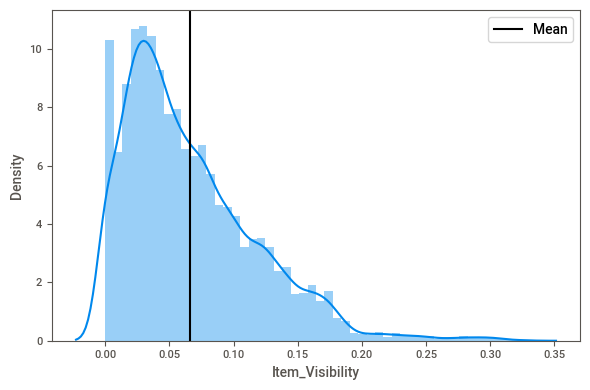

In [20]:
sns.distplot(data['Item_Visibility'])
plt.axvline(data['Item_Visibility'].mean(),c='k',label='Mean')

plt.legend()
plt.tight_layout()

In [21]:
visibility_df=data.pivot_table(values='Item_Visibility',index='Item_Identifier')
visibility_df

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [22]:
missing=(data['Item_Visibility']==0)

data.loc[missing,'Item_Visibility']=data.loc[missing,'Item_Identifier'].apply(lambda x: visibility_df.loc[x,'Item_Visibility'])

In [23]:
sum(data['Item_Visibility']==0)

0

C:\Users\Dishaa\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


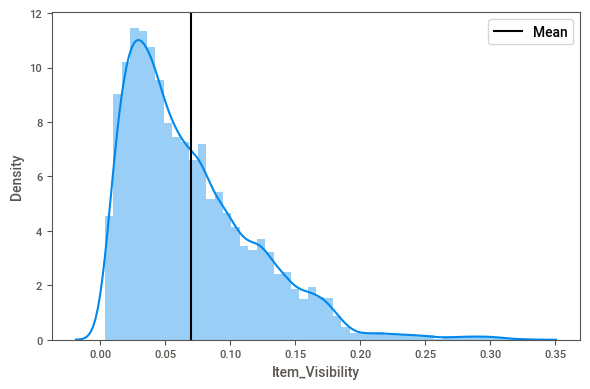

In [24]:
sns.distplot(data['Item_Visibility'])
plt.axvline(data['Item_Visibility'].mean(),c='k',label='Mean')

plt.legend()
plt.tight_layout()

In [25]:
## Create a new feature here

##### We had earlier seen that Item_Identifier had 16 unique categories. We will group then as Food, Drinks and Non-Consumable depending on the first two letters of the Item_Identifier

In [26]:
data['Item_Identifier'].apply(lambda x:x[:2]).unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [27]:
data['Item_Type_Combined']=data['Item_Identifier'].apply(lambda x:x[:2])

In [28]:
data['Item_Type_Combined']=data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

In [29]:
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

#### Further combining the categories of Item_Identifier according to the Target variable and combining those who have higher values.

In [30]:
item_identifier_part_2=data.pivot_table(values='Item_Outlet_Sales',index='Item_Type_Combined')
item_identifier_part_2

,Item_Outlet_Sales
Item_Type_Combined,
Drinks,1997.333337
Food,2215.354223
Non-Consumable,2142.721364


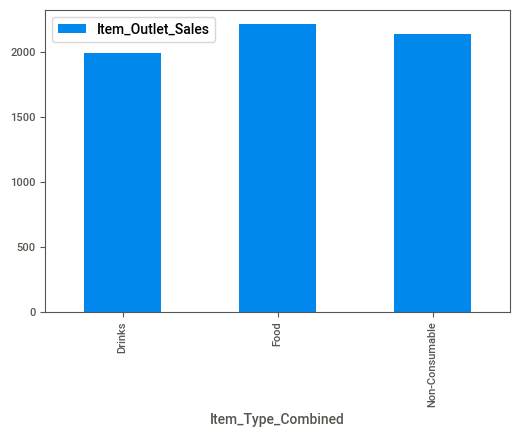

In [31]:
item_identifier_part_2.plot(kind='bar')
plt.savefig('Items_combined.png')

#### Combine these categories based on sales.

In [32]:
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [33]:
data['Item_Type_Combined']=data['Item_Type_Combined'].replace({'Food':'Consumable','Drinks':'Consumable'})

In [34]:
data['Item_Type_Combined'].value_counts()

Consumable        11518
Non-Consumable     2686
Name: Item_Type_Combined, dtype: int64

##### Finding the age of the store

In [35]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source', 'Item_Type_Combined'],
      dtype='object')

In [36]:
data['Store_Old']=2013-data['Outlet_Establishment_Year']

In [37]:
data['Store_Old'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Store_Old, dtype: float64

This shows that the stores are basically 4-28 years old

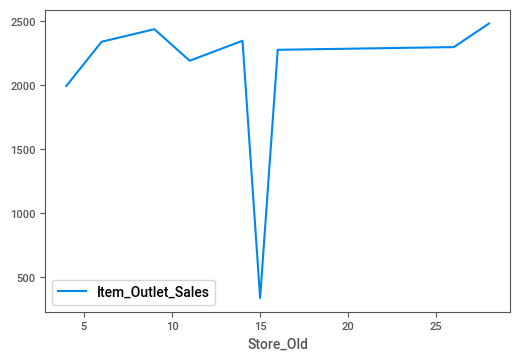

In [38]:
data.pivot_table(values='Item_Outlet_Sales',index='Store_Old').plot()
plt.savefig('Oulter_Old.png')

1. We can see that stores which are older than 25 years have the highest sales.

2. New Stores have lowest sales.

#### We had earlier in the data exploration seen that Item_Fat_Content has many typo mistakes. We will correct them.

In [39]:
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [40]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})

In [41]:
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

##### We can see that some Non-Consumable items are also considered as Low_fat. So we will declare them as 'Non-edible'.

In [42]:
data[data['Item_Fat_Content']=='Low Fat']['Item_Type_Combined'].head()

0         Consumable
2         Consumable
4     Non-Consumable
7         Consumable
10        Consumable
Name: Item_Type_Combined, dtype: object

In [43]:
data.loc[data['Item_Type_Combined']=='Non-Consumable','Item_Fat_Content']='Non-Edible'

In [44]:
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
 13  Item_Type_Combined         14204 non-null  obj

### Encoding

In [46]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [47]:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [48]:
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Store_Old,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,14,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,4,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,14,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,15,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.009780,Household,53.8614,OUT013,1987,994.7052,train,26,...,0,1,0,0,0,0,0,0,0,0


### Converting the data back to train & test

It is generally a good idea to save the modified data fie as it can later be used for other purposes.

In [49]:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

train=data.loc[data['source']=='train']
test=data.loc[data['source']=='test']

In [50]:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

C:\Users\Dishaa\Anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [51]:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

### Model Building

In [52]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import KFold,cross_val_score

In [53]:
def model_fit(model,train,test,columns_needed,target,IDcols,filename):
    
    model.fit(train[columns_needed],train[target]) # Train the model
    
    train_predictions = model.predict(train[columns_needed]) # Make prediction on the data
    
    ## Cal Cross validation score
    cv_score=-cross_val_score(model,train[columns_needed],train[target],cv=5,scoring='neg_mean_squared_error')
    cv_score=np.sqrt(np.abs(cv_score))
    
    print('CV_mean is : {}'.format(np.round(np.mean(cv_score),0)))
    print('CV_std is : {}'.format(np.round(np.mean(cv_score),0)))
    
    ## Calculate the RMSE score
    print('RMSE score on train data : {}'.format(np.round(np.sqrt(mean_squared_error(train[target],train_predictions)),0)))
    
    ## Prediction on test data
    test_predictions = model.predict(test[columns_needed])
    

    ## Adding the test predictions to the submission file
    submission=pd.DataFrame({x:test[x] for x in IDcols})
    submission[target]= np.abs(test_predictions)
    
    submission.to_csv(filename, index=False)
    
    
    

In [54]:
target='Item_Outlet_Sales'
IDcols=['Item_Identifier','Outlet_Identifier']
columns_needed=[i for i in train.columns if i not in [target]+IDcols]

#### Linear Regression

In [55]:
lr=LinearRegression(normalize=True)

model_fit(lr,train,test,columns_needed,target,IDcols,'Linear_Regression.csv')

CV_mean is : 1130.0
CV_std is : 1130.0
RMSE score on train data : 1128.0


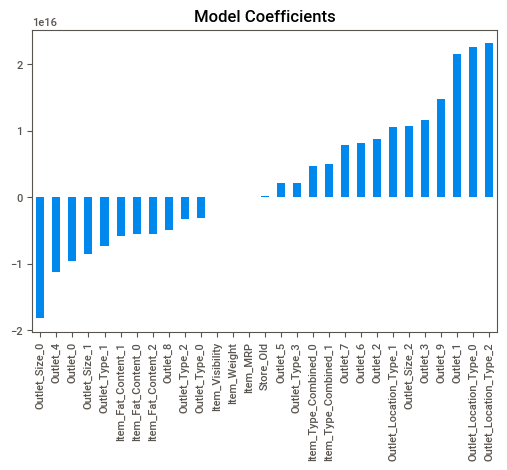

In [56]:
coef1 = pd.Series(lr.coef_, columns_needed).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')
plt.savefig('Linear_Regression_Coeff.png')

##### We can see that the model coeff values are very high that might be due to Overfitting so we will try other Regularization methods to avoid overfiting.

#### Lasso

In [57]:
lasso=Lasso(alpha=1.0,random_state=5,normalize=True)

model_fit(lasso,train,test,columns_needed,target,IDcols,'Lasso.csv')


CV_mean is : 1141.0
CV_std is : 1141.0
RMSE score on train data : 1144.0


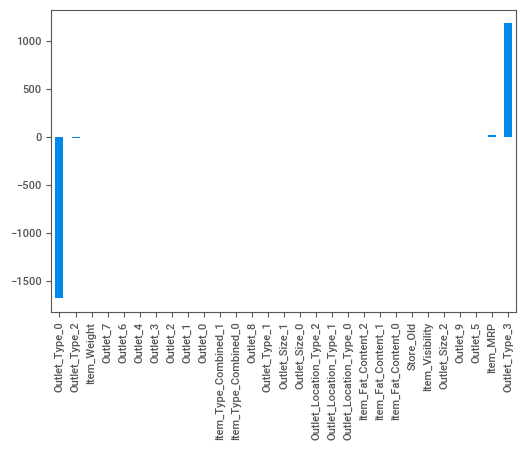

In [58]:
# plt.plot(,columns_needed,kind='bar')
coef=pd.Series(lasso.coef_,columns_needed).sort_values()
coef.plot(kind='bar',label='Model Coeff')

plt.savefig('Lasso_Coeff.png')

##### We can see that as we increase the 'alpha' the number of selected features keep on decreasing.

#### ElasticNet

In [59]:
en=ElasticNet(alpha=2.0,
    l1_ratio=0.5,
    random_state=5,
    normalize=True)

In [60]:
model_fit(en,train,test,columns_needed,target,IDcols,'Elasic_Net.csv')

CV_mean is : 1706.0
CV_std is : 1706.0
RMSE score on train data : 1706.0


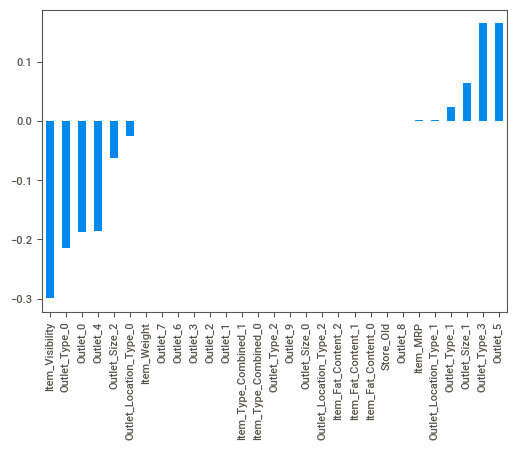

In [61]:
coef=pd.Series(en.coef_,columns_needed).sort_values()
coef.plot(kind='bar',label='Model Coeff')
plt.savefig('Elastic_Net_Coeff.png')


#### Decision tree 

In [62]:
dtree=DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
model_fit(dtree,train,test,columns_needed,target,IDcols,'Decisiontree.csv')

CV_mean is : 1095.0
CV_std is : 1095.0
RMSE score on train data : 1060.0


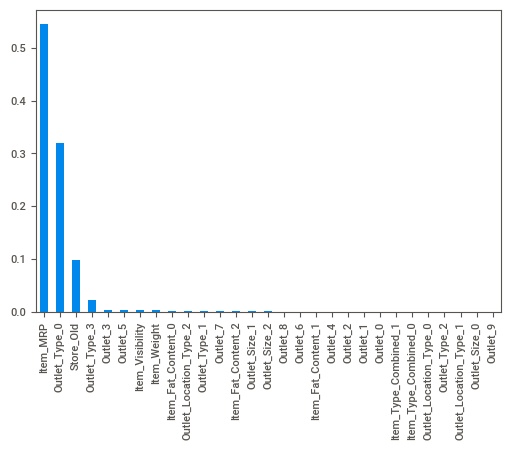

In [63]:
coef=pd.Series(dtree.feature_importances_,columns_needed).sort_values(ascending=False)
coef.plot(kind='bar', label='Feature Importance ')

plt.savefig('Desicion_Tree.png')

##### Lets try taking only the important features.

In [64]:
dtree_features=['Item_MRP','Outlet_Type_0','Outlet_3','Store_Old']

dtree=DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
model_fit(dtree,train,test,columns_needed,target,IDcols,'Decisiontree.csv')

CV_mean is : 1100.0
CV_std is : 1100.0
RMSE score on train data : 1069.0


#### Random Forest

In [65]:
random_tree=RandomForestRegressor(n_estimators=200,
    max_depth=15,
    min_samples_split=100)

model_fit(random_tree,train,test,columns_needed,target,IDcols,'Randomtree.csv')

CV_mean is : 1085.0
CV_std is : 1085.0
RMSE score on train data : 1005.0


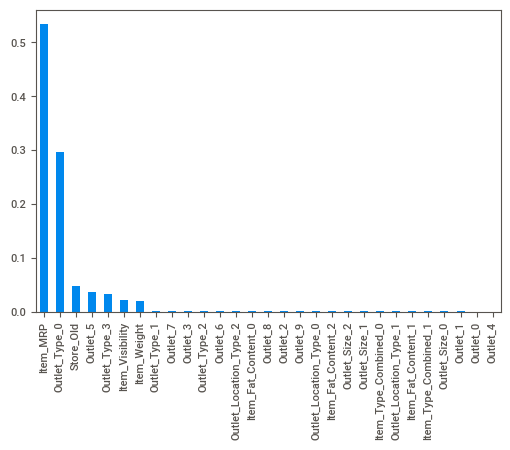

In [66]:
coef=pd.Series(random_tree.feature_importances_,columns_needed).sort_values(ascending=False)
coef.plot(kind='bar', label='Feature Importance')

plt.savefig('Random_Forest.png')

##### Lets try with using only the important features.

In [67]:
random_tree_features=['Item_MRP','Outlet_Type_0','Outlet_3','Store_Old','Item_Weight','Item_Visibility','Outlet_5']


random_tree=RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)

model_fit(random_tree,train,test,random_tree_features,target,IDcols,'Randomtree.csv')

CV_mean is : 1089.0
CV_std is : 1089.0
RMSE score on train data : 1069.0


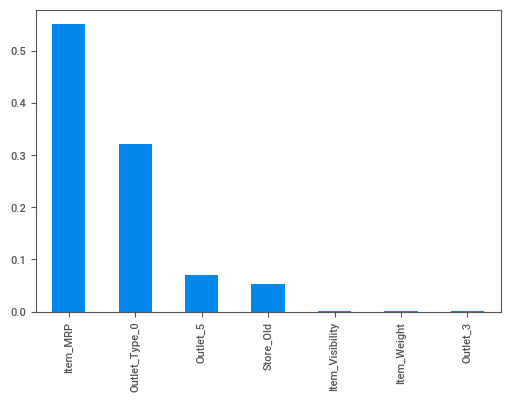

In [68]:
coef=pd.Series(random_tree.feature_importances_,random_tree_features).sort_values(ascending=False)
coef.plot(kind='bar',label='RandomForest Feature Importance')

plt.savefig('Random_Forest_Feature_Selection.png')

### Hyper Parameter Tuning

In this we will be using Random Forest with Grid search CV

In [219]:
from sklearn.model_selection import GridSearchCV

n_estimators=[100,200,300,400,500]
max_depth=[int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split=[2,4,6,8,10,12,14,16,20]
# max_features=['auto','sqrt','log2']


parameters={'n_estimators':n_estimators,'max_depth':max_depth,'min_samples_split':min_samples_split}



In [69]:
random_tree=RandomForestRegressor()

grid = GridSearchCV(estimator = random_tree, param_grid = parameters, cv = 5)

grid.fit(train[columns_needed],train[target])

## Refrences

https://www.analyticsvidhya.com/blog/2016/02/bigmart-sales-solution-top-20/

https://courses.analyticsvidhya.com/courses/take/big-mart-sales-prediction-using-r/texts/6120118-missing-value-treatment